# Central Location

Individuals are assigned a probability to visit and hung around a central hub (eg. supermarket) before coming back to their community

In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [199]:
def replay_plot(negatives, positives, survivors, deaths, df, grid_max, loc_grid):
    fig = make_subplots(rows=2, cols=1)

    fig.add_trace(
        go.Scatter(x=[i for i in range(len(negatives))], y=negatives,
                         mode="lines",
                         line=dict(width=2, color="blue"), name='Susceptible',),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(x=[i for i in range(len(negatives))], y=positives,
                         mode="lines",
                         line=dict(width=2, color="green"), name='Infected',),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(x=[i for i in range(len(negatives))], y=survivors,
                         mode="lines",
                         line=dict(width=2, color="orange"), name='Recovered',),
        row=1, col=1
    )
    
    fig.add_trace(
        go.Scatter(x=[i for i in range(len(negatives))], y=deaths,
                         mode="lines",
                         line=dict(width=2, color="black"), name='Died',),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(
        x=df[(df['index']==len(df['index'].unique())-1) & (df['state']=='Susceptible')]['x_pos'], 
        y=df[(df['index']==len(df['index'].unique())-1) & (df['state']=='Susceptible')]['y_pos'],
        name='Susceptible',
        mode='markers',
        marker=dict(
        color="blue"),
        showlegend=False
        ),
        row=2, col=1)

    fig.add_trace(go.Scatter(
        x=df[(df['index']==len(df['index'].unique())-1) & (df['state']=='Infected')]['x_pos'], 
        y=df[(df['index']==len(df['index'].unique())-1) & (df['state']=='Infected')]['y_pos'],
        name='Infected',
        mode='markers',
        marker=dict(
        color="green"),
        showlegend=False
        ),
        row=2, col=1)

    fig.add_trace(go.Scatter(
        x=df[(df['index']==len(df['index'].unique())-1) & (df['state']=='Recovered')]['x_pos'], 
        y=df[(df['index']==len(df['index'].unique())-1) & (df['state']=='Recovered')]['y_pos'],
        name='Recovered',
        mode='markers',
        marker=dict(
        color="orange"),
        showlegend=False
        ),
        row=2, col=1)
    
    fig.add_trace(go.Scatter(
        x=loc_grid[0], 
        y=loc_grid[1],
        name='Central Hub',
        mode='markers',
        marker=dict(size=1,
        color="red"),
        showlegend=True
        ),
        row=2, col=1)


    frames =[go.Frame(
            data=[go.Scatter(
                x=[i for i in range(k)],
                y=negatives,
                mode="lines",
                line=dict(width=2, color="blue")),
                 go.Scatter(
                x=[i for i in range(k)],
                y=positives,
                mode="lines",
                line=dict(width=2, color="green")),
                 go.Scatter(
                x=[i for i in range(k)],
                y=survivors,
                mode="lines",
                line=dict(width=2, color="orange")),
                 go.Scatter(
                x=[i for i in range(k)],
                y=deaths,
                mode="lines",
                line=dict(width=2, color="black")),
                go.Scatter(
                    x=df[(df['index']==k) & (df['state']=='Susceptible')]['x_pos'], 
                    y=df[(df['index']==k) & (df['state']=='Susceptible')]['y_pos'],
                    mode='markers',
                    marker=dict(
                    color="blue")
                    ),
                go.Scatter(
                    x=df[(df['index']==k) & (df['state']=='Infected')]['x_pos'], 
                    y=df[(df['index']==k) & (df['state']=='Infected')]['y_pos'],
                    mode='markers',
                    marker=dict(
                    color="green")
                    ),
                go.Scatter(
                    x=df[(df['index']==k) & (df['state']=='Recovered')]['x_pos'], 
                    y=df[(df['index']==k) & (df['state']=='Recovered')]['y_pos'],
                    mode='markers',
                    marker=dict(
                    color="orange")
                    ),
                ],
                traces=[0,1,2,3,4,5,6])

            for k in range(len(negatives))] 

    fig.frames=frames
    fig.update_layout(
        shapes=[
            # unfilled circle
            dict(
                type="rect",
                xref="x2",
                yref="y2",
                x0=loc_grid[0][0],
                y0=loc_grid[1][0],
                x1=loc_grid[0][1],
                y1=loc_grid[1][1],
                line_color="red",
                line=dict(
                width=2,
            ),
            ), 
        ],
        updatemenus= [
                {
                    "buttons": [
                        {
                            "args": [None, {"frame": {"duration": 100, "redraw": False},
                                            "fromcurrent": True, 
                                            "transition": {"duration": 10,
                                                           "easing": "quadratic-in-out"}}],
                            "label": "Play",
                            "method": "animate"
                        },
                        {
                            "args": [[None], {"frame": {"duration": 0, "redraw": False},
                                              "mode": "immediate",
                                              "transition": {"duration": 0}}],
                            "label": "Pause",
                            "method": "animate"
                        }
                    ],
                    "direction": "left",
                    "pad": {"r": 10, "t": 87},
                    "showactive": False,
                    "type": "buttons",
                    "x": 0.14,
                    "xanchor": "right",
                    "y": 1.4,
                    "yanchor": "top"
                }
            ],)
    
    fig.update_xaxes(title_text="Simulation Steps", row=1, col=1)
    fig.update_yaxes(title_text="Number of Cases", row=1, col=1)
    fig.update_xaxes(title_text="X", range=[0,grid_max[0][1]], row=2, col=1)
    fig.update_yaxes(title_text="Y", range=[0,grid_max[1][1]], row=2, col=1)
    fig.update_layout(height=600, width=800, title_text="Central Hub Modelling")
    fig.show()

In [204]:
class Person:
    def __init__(self, situation, position, speed, extremes, age):
        self.situation, self.position = situation, position
        self.speed, self.extremes = speed, extremes
        angle = np.random.uniform(0, 2*np.pi)
        self.x_dir, self.y_dir = np.cos(angle), np.sin(angle)
        self.age = age
        self.reabilitation = 0
        
    def step_ahead(self, community, proximity, contagiousness, no_move, deaths_p, 
                   central_location_grid, prob_to_visit_location):
        self = contacts(self, community, proximity, contagiousness, deaths_p)
        self = new_pos(self, no_move, central_location_grid, prob_to_visit_location)

def contacts(ind, community, proximity, unlikelyness_of_contact, p_died):
    if (ind.situation == 2) or (ind.situation == 3):
        pass
    elif ind.situation == 1:
        if np.random.choice(2, 1, p=[1-p_died*ind.age, p_died*ind.age])[0] == 0:
            ind.reabilitation += 1
            if ind.reabilitation >= 14:
                ind.situation = 2
        else:
            ind.situation = 3
    else:
        close_people = 0
        for friend in community:
            xx = (ind.position[0]-friend.position[0])
            yy = (ind.position[1]-friend.position[1])
            if (friend.situation == 1) and ((np.sqrt(xx**2 + yy**2) < proximity)):
                close_people += 1
        if sum([1 for x in np.random.random(close_people) if x >unlikelyness_of_contact]) > 0:
            ind.situation = 1
    return ind

def angle_between2(p1, p2):
    #ang = np.arctan2(p1,p2)
    ang = np.arctan2(p2,p1)
    return ang

def check_bounds(ind, x_or_y, travelled_dist, i, no_move, central_location_grid, prob_to_visit_location):
    if np.random.choice(2, 1, p=[1-prob_to_visit_location, prob_to_visit_location])[0] ==1:
        # x procedure
        if ind.position[i] == ind.position[0]:
            des_pos = random.uniform(central_location_grid[0][0], central_location_grid[0][1])
            if ind.position[i] < des_pos:
                updated_dir = angle_between2(ind.position[i], des_pos)
            else:
                updated_dir = angle_between2(des_pos, ind.position[i])
            if ind.position[i] < central_location_grid[0][0] or ind.position[i] > central_location_grid[0][1]:
                whitin_bounds = False
            else:
                ind.extremes = central_location_grid
                whitin_bounds = True
        # y procedure
        else:
            des_pos = random.uniform(central_location_grid[1][0], central_location_grid[1][1])
            if ind.position[i] < des_pos:
                updated_dir = angle_between2(ind.position[i], des_pos)
            else:
                updated_dir = angle_between2(des_pos, ind.position[i])
            if ind.position[i] < central_location_grid[1][0] or ind.position[i] > central_location_grid[1][1]:
                whitin_bounds = False
            else:
                ind.extremes = central_location_grid
                whitin_bounds = True
        if whitin_bounds:
            if ind.position[i] > des_pos:
                updated_pos = ind.position[i] - updated_dir*travelled_dist
                updated_dir = -updated_dir
            else:
                updated_pos = ind.position[i] + updated_dir*travelled_dist
        else:
            if ind.position[i] > des_pos:
                updated_pos = ind.position[i] - updated_dir*travelled_dist
                updated_dir = -updated_dir
            else:
                updated_pos = ind.position[i] + updated_dir*travelled_dist
    else:
            if ind.position[i] + x_or_y*travelled_dist < ind.extremes[i][0]:
                updated_pos = -ind.position[i] + (-x_or_y*travelled_dist) + 2*ind.extremes[i][0]
                updated_dir = -x_or_y 
            elif ind.position[i] + x_or_y*travelled_dist > ind.extremes[i][1]:
                updated_pos = -ind.position[i] + (-x_or_y*travelled_dist) + 2*ind.extremes[i][1]
                updated_dir = -x_or_y
            else:
                updated_pos = ind.position[i] + x_or_y*travelled_dist
                if no_move:
                    updated_dir = 0 
                else:    
                    updated_dir = x_or_y
    return updated_pos, updated_dir

def new_pos(ind, no_move, central_location_grid,  prob_to_visit_location):
    travelled_dist = ind.speed*np.random.random()
    ind.position[0], ind.x_dir = check_bounds(ind, ind.x_dir, travelled_dist, 0, no_move, 
                                              central_location_grid, prob_to_visit_location)
    ind.position[1], ind.y_dir = check_bounds(ind, ind.y_dir, travelled_dist, 1, no_move, 
                                              central_location_grid, prob_to_visit_location)
    return ind


def pop_simulation(size, iterations, probs_positives, 
                   grid_lists, min_contact_radious, 
                   unlikelyness_of_spread, static, d_p, avg_age, central_location_grid,
                   prob_to_visit_location):
    population = []
    for grid_l in grid_lists:
        for i in range(0, size//len(grid_lists)):
            population.append(Person(np.random.choice(2, 1, p=[1-probs_positives, probs_positives])[0], 
                                    [random.uniform(grid_l[0][0], grid_l[0][1]), 
                                     random.uniform(grid_l[1][0], grid_l[1][1])],
                                    random.uniform(0, 1), grid_l, 
                                    min(2, max(1, np.random.normal(1+avg_age, 0.12, 1)[0]))))


    negatives, positives, survivors = [], [], []
    x_res, y_res, state = [], [], []
    index, deaths = [], []
    for it in range(iterations):
        it_negative, it_positives, it_survivors, it_dead = 0, 0, 0, 0
        for i, single in enumerate(population):
            x_res.append(single.position[0])
            y_res.append(single.position[1])
            index.append(it)
            if single.situation == 0:
                it_negative += 1
                state.append('Susceptible')
            elif single.situation == 1:
                it_positives += 1
                state.append('Infected')
            elif single.situation == 3:
                it_dead += 1
                state.append('Died')
            else:
                it_survivors += 1
                state.append('Recovered')
            single.step_ahead(population[:i]+population[i+1:], min_contact_radious, 
                              unlikelyness_of_spread, no_move=static, deaths_p=d_p, 
                              central_location_grid=central_location_grid, 
                              prob_to_visit_location= prob_to_visit_location)
        negatives.append(it_negative)
        positives.append(it_positives)
        survivors.append(it_survivors)
        deaths.append(it_dead)
        
    return negatives, positives, survivors, deaths, x_res, y_res, state, index

78


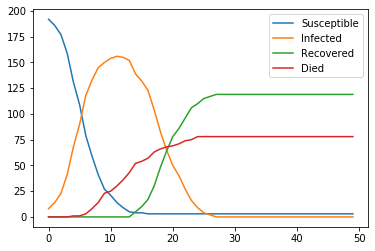

In [201]:
probs_positives = 0.04
# The first pair represents the bounding X coordinates, while the second pair represents the Y coordinates
grid_max = [[0, 5], [0, 5]]
grid_limits = [[[0, 1], [0,1]], [[4, 5], [4, 5]], [[0, 1], [4, 5]], [[4, 5], [0, 1]]]
min_contact_radious = 0.3
unlikelyness_of_spread = 0.9
iterations = 50
size = 200
static = False
d_p = 0.02
avg_age = 0.9
central_location_grid =  [[2,3], [2,3]] #[[4, 5], [0, 1]] # [[2,3],[2,3]] # [[1,2], [0,1]]
prob_to_visit_location = 0.3

negatives, positives, survivors, deaths, x_res, y_res, state, index = pop_simulation(size, iterations, 
                                                                                     probs_positives, 
                                                                                     grid_limits, 
                                                                                     min_contact_radious, 
                                                                                     unlikelyness_of_spread, 
                                                                                     static, d_p, avg_age,
                                                                                    central_location_grid,
                                                                                    prob_to_visit_location)

print(deaths[len(deaths)-1])
plt.plot(negatives, label='Susceptible')
plt.plot(positives, label='Infected')
plt.plot(survivors, label='Recovered')
plt.plot(deaths, label='Died')
plt.legend()
plt.show()

In [202]:
d = {'x_pos': x_res, 'y_pos': y_res, 'state': state, 'index':index}
df = pd.DataFrame(data=d)
#df.head()
for i in list(df['index'].unique()):
    for j in list(df['state'].unique()):
        if len(df[(df['index']==i) & (df['state'] == j)]) == 0:
            df = df.append(pd.DataFrame([[grid_max[0][1]+5, grid_max[1][1]+5, j, i]], 
                                        columns=df.columns))

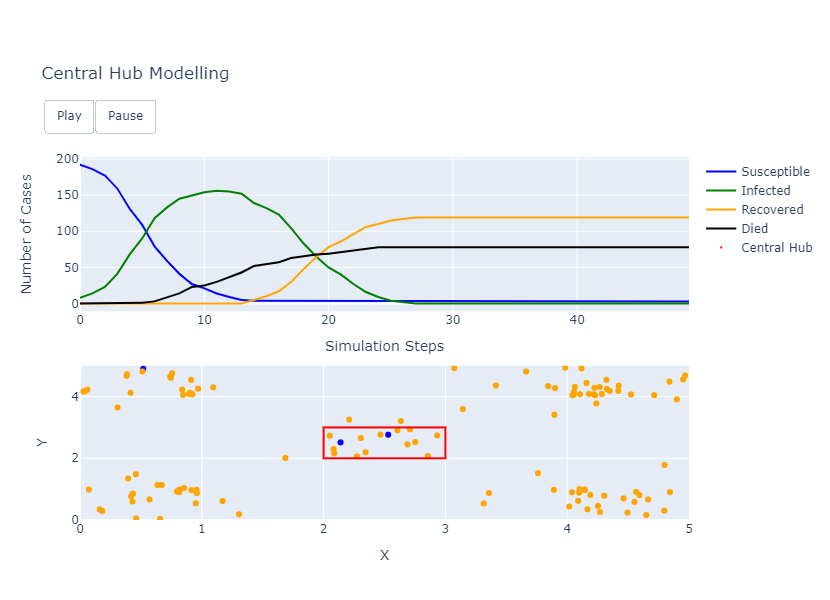

In [203]:
replay_plot(negatives, positives, survivors, deaths, df, grid_max=grid_max, loc_grid=central_location_grid)